# ***Reparameterization of common distributions***





We will work with Torch throughout this notebook.

In [ ]:
import torch
from torch.distributions import Beta, Dirichlet#, ...  import the distributions you need here
from torch.nn import functional as F

### ***Q1. Beta Distribution***
Below write a function that generates N samples from $Beta(a,b)$

In [46]:
def beta_sampler(a, b, N):
  # insert your code
  beta_dist = torch.distributions.Beta(a, b)
  samples = beta_dist.sample((N,))
  return samples # should be N-by-1

Now, reparameterize $Beta(a,b)$ via Kumaraswamy(a,b) approximation:

In [44]:
def beta_reparametrize(a,b,N):
  # this function should return N samples as well,
  # but they are generated using the reparameterization trick
  x = torch.rand(N)
  samples = (1 - (1 - x) ** (1/b)) ** (1/a)
  # insert your code

  return samples

Now, generate 1000 samples from $Beta(a,b)$, where  $a = 1 $, $ b = 0.7$, both directly and using the reparameterization.

In [47]:
a = 1
b = 0.7
N = 1000
direct_samples = beta_sampler(a, b, N)
reparametrized_samples = beta_reparametrize(a, b, N)

A helper function to visualize the generated samples:

In [48]:
import matplotlib.pyplot as plt
def compare_samples (samples_1, samples_2, bins=100, range=None):
  fig = plt.figure()
  if range is not None:
    plt.hist(samples_1, bins=bins, range=range)
    plt.hist(samples_2, bins=bins, range=range)
  else:
    plt.hist(samples_1, bins=bins)
    plt.hist(samples_2, bins=bins)
  plt.xlabel('value')
  plt.ylabel('number of samples')
  plt.legend(['direct','via reparameterization'])
  plt.show()

Compare the generated samples:

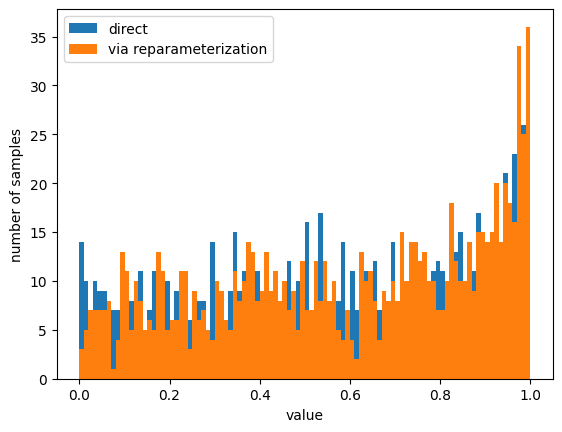

In [49]:
compare_samples (direct_samples, reparametrized_samples)

### ***Q2. Dirichlet Distribution***


Write a function that generates N samples from Dirichlet ($\alpha$), where $\alpha = [\alpha_0, \alpha_1, \alpha_2]$.

In [ ]:
def dirichlet_sampler(alpha, N):
  # insert your code

  return samples  # should be N-by-3

Implement the reparameterization trick for the Dirichlet distribution:

In [ ]:
# Hint: approximate it by the Softmax-Gaussian distribution.
def dirichlet_reparametrize(alpha, N):
  # insert your code


  return samples

Generate samples for $\alpha= [1, 10, 1]$:

In [ ]:
alpha = torch.Tensor([1, 10, 1])
N = 100
direct_samples = dirichlet_sampler(alpha, N)
reparametrized_samples = dirichlet_reparametrize(alpha, N)

A helper function to visualize dirichlet samples:

In [ ]:
def dirichlet_plotter (samples_1, samples_2, idx):
  fig = plt.figure()

  plt.bar([1,2,3], samples_1[idx,:])
  plt.xlabel('categories')
  plt.ylabel('prob')
  plt.title('direct sampling')
  plt.xticks([1, 2, 3], ['1', '2', '3'])
  fig = plt.figure()
  plt.bar([1,2,3], samples_2[idx,:])
  plt.xlabel('categories')
  plt.ylabel('prob')
  plt.title('via reparametrization')
  plt.xticks([1, 2, 3], ['1', '2', '3'])
  plt.show()

Compare the samples drawn from the Dirichlet distribution and the samples drawn from the reparametrized version of it (do it for a few different idx):

In [ ]:
dirichlet_plotter(direct_samples, reparametrized_samples, idx=1) # idx= 0, 1, ..., N